# ErgoPose Risk Classifier — Exploratory Data Analysis (EDA)

This notebook is the **second stage** of the *ErgoPose Risk Classifier* project.  
It performs an **exploratory data analysis** on the cleaned dataset to better understand the posture data and quality index before model training.

### Objectives
- Load the preprocessed dataset from the `data/processed/` folder.
- Explore the class distribution for upper and lower body labels.
- Visualize coordinate distributions and correlations.
- Examine the Quality Index and its relationship with posture labels.
- Detect possible outliers or imbalanced classes.

### Input and Output
- **Input:** `data/processed/clean_postural_risk_dataset.csv`  
- **Output:** No output file (visual analysis only).


In [1]:
"""
Imports the necessary libraries for exploratory data analysis and visualization.
"""

# [1] Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="viridis")


In [2]:
"""
Loads the processed dataset prepared in Notebook 01.
"""

# [2] Load dataset
DATA_PATH = Path("../data/processed/clean_postural_risk_dataset.csv")

df = pd.read_csv(DATA_PATH)
print(f"✅ Dataset loaded successfully! Shape: {df.shape}")
df.head()


✅ Dataset loaded successfully! Shape: (4794, 52)


,upperbody_label,nose_x,nose_y,left_eye_inner_x,left_eye_inner_y,left_eye_x,left_eye_y,left_eye_outer_x,left_eye_outer_y,right_eye_inner_x,right_eye_inner_y,right_eye_x,right_eye_y,right_eye_outer_x,right_eye_outer_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,mouth_left_x,mouth_left_y,mouth_right_x,mouth_right_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_pinky_x,left_pinky_y,right_pinky_x,right_pinky_y,left_index_x,left_index_y,right_index_x,right_index_y,left_thumb_x,left_thumb_y,right_thumb_x,right_thumb_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,quality_index
0,TLB,0.067508,-0.690424,0.003833,-0.669347,-0.001735,-0.675613,0.005537,-0.672292,-0.006572,-0.633540,-0.015471,-0.634317,-0.005442,-0.626643,-0.152357,-0.732795,-0.197464,-0.576043,0.021927,-0.706275,0.028065,-0.659882,-0.299781,-0.734982,-0.179381,-0.290537,-0.394079,-0.749804,-0.006288,0.111650,-0.220777,-0.962779,-0.482341,0.806305,-0.154682,-0.574074,-0.581504,0.896036,-0.247492,-0.365593,-0.562769,1.004645,-0.250988,-0.878312,-0.518416,0.901779,-0.120703,-0.823840,0.238245,0.922061,0.167460
1,TLB,-0.272309,-0.395884,-0.273485,-0.372456,-0.281219,-0.389630,-0.273896,-0.389065,-0.300297,-0.368743,-0.311096,-0.371810,-0.306175,-0.362613,-0.274180,-0.448218,-0.486308,-0.316995,-0.275380,-0.424068,-0.309955,-0.377450,-0.403589,-0.444879,-0.476747,-0.120799,-0.039637,-0.366291,-0.960873,-0.232274,0.997163,0.215802,-1.447315,0.159545,1.144020,0.230039,-1.487079,0.201799,1.166129,0.399506,-1.402920,0.334725,1.061984,0.279399,-1.436717,0.261758,0.095575,-0.848495,0.091256,0.941311,0.524197
2,TLB,-0.190106,-0.754564,-0.162555,-0.713595,-0.167212,-0.733306,-0.163045,-0.721052,-0.185081,-0.728218,-0.200192,-0.734715,-0.185446,-0.722628,-0.144084,-0.663402,-0.339681,-0.659354,-0.194444,-0.748839,-0.236043,-0.745709,-0.370473,-0.586706,-0.422272,-0.340473,-0.039676,-0.585732,-0.874785,-0.414201,1.032045,0.059518,-1.426226,0.151513,1.180172,0.117611,-1.474816,0.201471,1.205311,0.313895,-1.394581,0.347370,1.100972,0.155602,-1.416907,0.259396,0.094515,-0.848734,0.093636,0.941650,0.922670
3,TLB,-0.273715,-0.875807,-0.218362,-0.824820,-0.228002,-0.843962,-0.220253,-0.837880,-0.232822,-0.852573,-0.254145,-0.858314,-0.240312,-0.846195,-0.148983,-0.770012,-0.343602,-0.830629,-0.241982,-0.862575,-0.297185,-0.874906,-0.362031,-0.618361,-0.398123,-0.438031,-0.023707,-0.595752,-0.871617,-0.475447,1.051593,-0.011650,-1.419249,0.104502,1.197101,0.055756,-1.462463,0.187020,1.226847,0.236879,-1.379444,0.334698,1.122239,0.063184,-1.409926,0.219968,0.102244,-0.861803,0.082172,0.953326,1.035724
4,TLB,-0.325358,-0.876021,-0.263627,-0.827117,-0.273415,-0.846865,-0.268136,-0.838145,-0.278032,-0.852693,-0.299550,-0.858227,-0.286296,-0.843584,-0.154841,-0.785116,-0.349958,-0.838385,-0.273821,-0.871304,-0.338265,-0.878570,-0.355303,-0.633643,-0.382072,-0.494867,-0.015066,-0.673956,-0.874430,-0.560123,1.042696,-0.069100,-1.420614,0.081847,1.190566,0.016439,-1.464364,0.184439,1.223253,0.210385,-1.383152,0.333920,1.116220,0.015158,-1.411870,0.203589,0.106395,-0.861629,0.081567,0.953355,1.018897


In [3]:
"""
Displays general dataset information and key statistics.
"""

# [3] Info and Summary
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe().T)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4794 entries, 0 to 4793
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   upperbody_label    4794 non-null   object 
 1   nose_x             4794 non-null   float64
 2   nose_y             4794 non-null   float64
 3   left_eye_inner_x   4794 non-null   float64
 4   left_eye_inner_y   4794 non-null   float64
 5   left_eye_x         4794 non-null   float64
 6   left_eye_y         4794 non-null   float64
 7   left_eye_outer_x   4794 non-null   float64
 8   left_eye_outer_y   4794 non-null   float64
 9   right_eye_inner_x  4794 non-null   float64
 10  right_eye_inner_y  4794 non-null   float64
 11  right_eye_x        4794 non-null   float64
 12  right_eye_y        4794 non-null   float64
 13  right_eye_outer_x  4794 non-null   float64
 14  right_eye_outer_y  4794 non-null   float64
 15  left_ear_x         4794 non-null   float64
 16  left_ear_y

,count,mean,std,min,25%,50%,75%,max
nose_x,4794.0,-8.892900e-18,1.000104,-3.320602,-0.183581,-0.014391,0.204648,3.722428
nose_y,4794.0,9.485760e-17,1.000104,-1.414170,-0.564160,-0.291982,0.086835,5.676152
left_eye_inner_x,4794.0,2.075010e-17,1.000104,-3.380337,-0.178677,-0.009485,0.198672,3.729236
left_eye_inner_y,4794.0,5.928600e-18,1.000104,-1.375067,-0.562890,-0.298392,0.067641,5.692459
left_eye_x,4794.0,1.778580e-17,1.000104,-3.395743,-0.175215,-0.007162,0.203485,3.715131
left_eye_y,4794.0,-8.596470e-17,1.000104,-1.383537,-0.558156,-0.297972,0.060729,5.651577
left_eye_outer_x,4794.0,0.000000e+00,1.000104,-3.393740,-0.176377,-0.005533,0.204070,3.708403
left_eye_outer_y,4794.0,2.845728e-16,1.000104,-1.381831,-0.559648,-0.299730,0.064731,5.650052
right_eye_inner_x,4794.0,0.000000e+00,1.000104,-3.338139,-0.179488,-0.013679,0.197387,3.728668
right_eye_inner_y,4794.0,1.393221e-16,1.000104,-1.357354,-0.564306,-0.300838,0.070660,5.802496


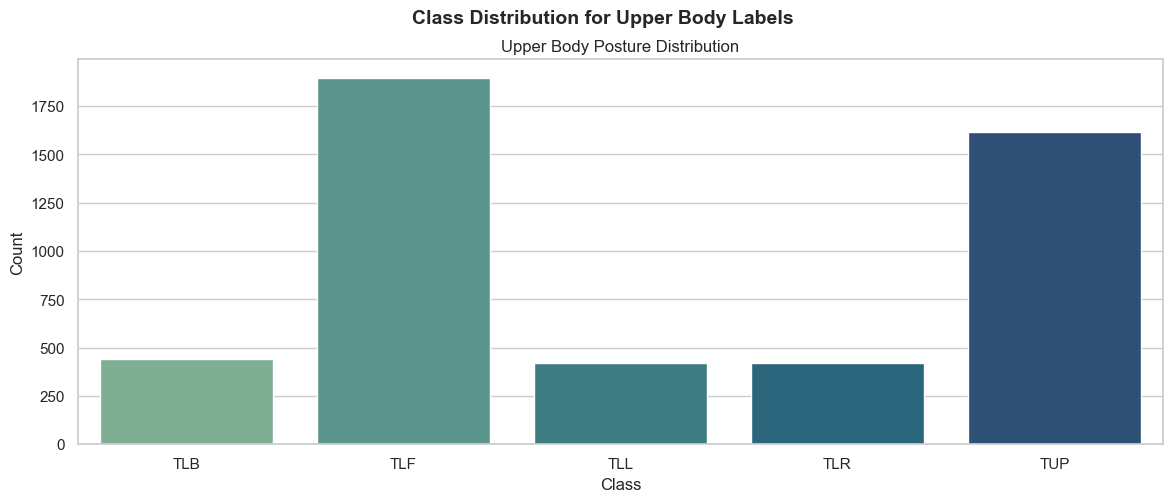

In [6]:
"""
Analyzes the distribution of posture labels.
"""

# [4] Class balance
fig, ax = plt.subplots(figsize=(14, 5))

# Updated to avoid future warnings
sns.countplot(ax=ax, x="upperbody_label", hue="upperbody_label", data=df, palette="crest", legend=False)
ax.set_title("Upper Body Posture Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

plt.suptitle("Class Distribution for Upper Body Labels", fontsize=14, weight="bold")
plt.show()


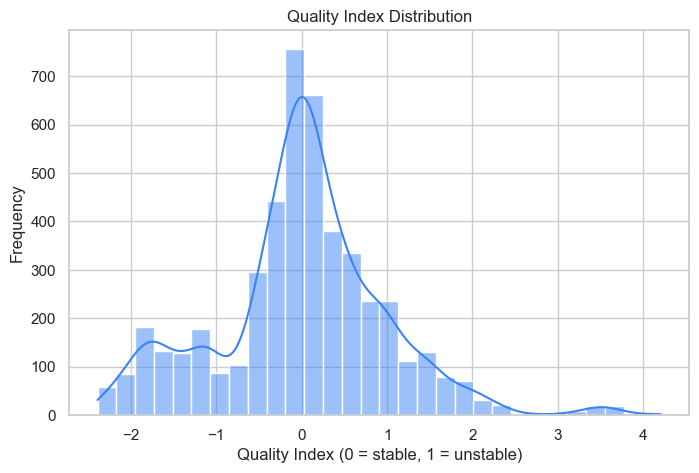

In [7]:
"""
Visualizes the distribution of the Quality Index across all frames.
"""

# [5] Quality Index distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["quality_index"], bins=30, kde=True, color="#3b82f6")
plt.title("Quality Index Distribution")
plt.xlabel("Quality Index (0 = stable, 1 = unstable)")
plt.ylabel("Frequency")
plt.show()

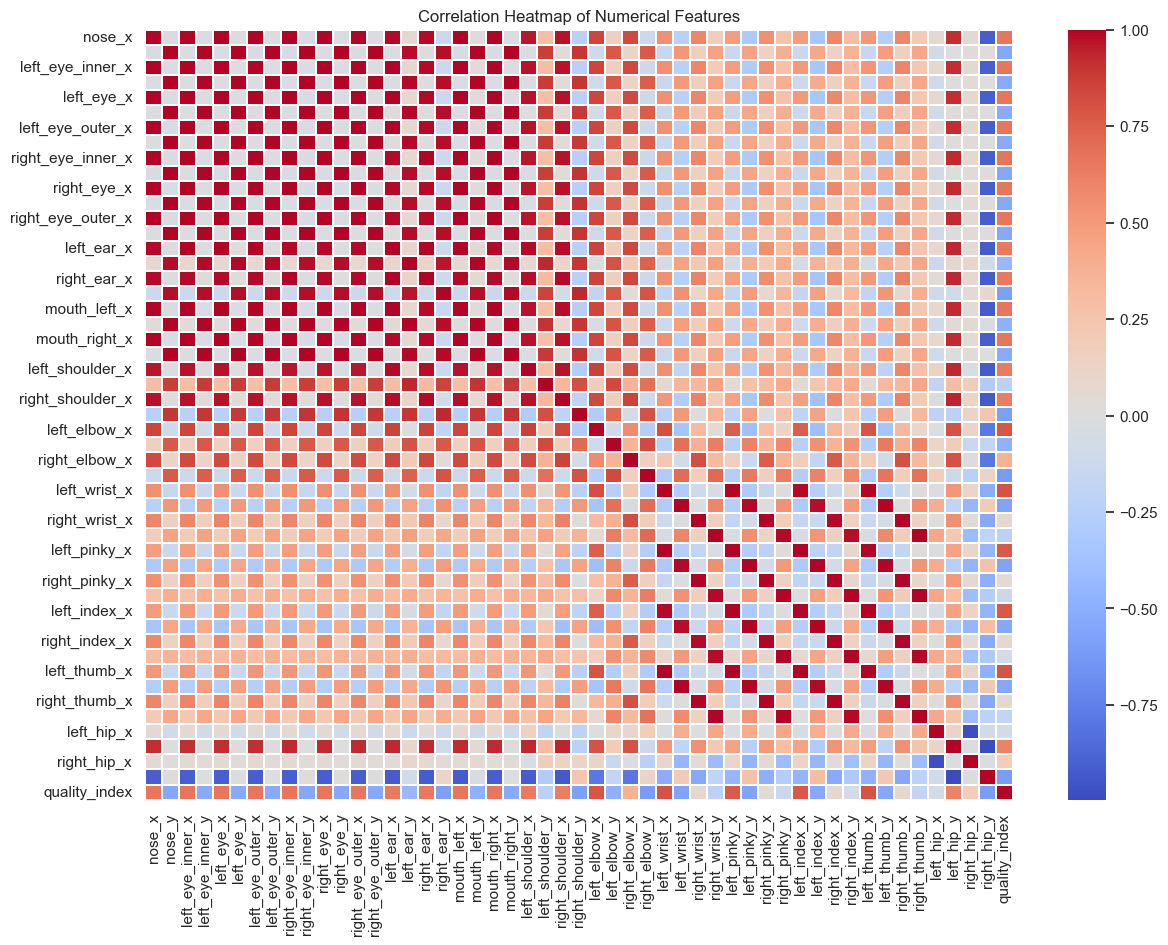

In [8]:
"""
Computes and visualizes correlations between numerical features and the Quality Index.
"""

# [6] Correlation analysis
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.3)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


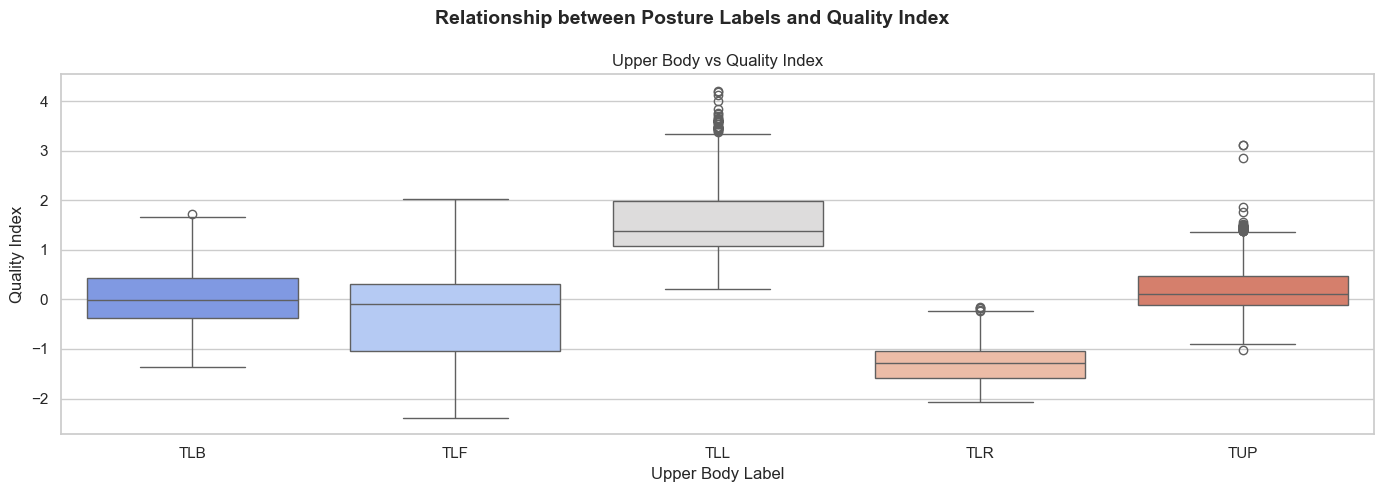

In [10]:
"""
Explores how the Quality Index varies according to upper and lower body labels.
"""

# [7] Quality Index vs. Labels
fig, ax = plt.subplots(figsize=(14, 5))

# Explicitly define hue to avoid deprecation warnings
sns.boxplot(ax=ax, x="upperbody_label", y="quality_index",
            hue="upperbody_label", data=df, palette="coolwarm", legend=False)
ax.set_title("Upper Body vs Quality Index")
ax.set_xlabel("Upper Body Label")
ax.set_ylabel("Quality Index")

plt.suptitle("Relationship between Posture Labels and Quality Index", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [11]:
"""
Detects potential outliers based on Quality Index thresholds.
"""

# [8] Outlier detection
threshold = df["quality_index"].mean() + 3 * df["quality_index"].std()
outliers = df[df["quality_index"] > threshold]

print(f"⚠️ Detected {outliers.shape[0]} potential outliers (Quality Index > {threshold:.3f}).")
display(outliers.head())


⚠️ Detected 50 potential outliers (Quality Index > 3.000).


,upperbody_label,nose_x,nose_y,left_eye_inner_x,left_eye_inner_y,left_eye_x,left_eye_y,left_eye_outer_x,left_eye_outer_y,right_eye_inner_x,right_eye_inner_y,right_eye_x,right_eye_y,right_eye_outer_x,right_eye_outer_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,mouth_left_x,mouth_left_y,mouth_right_x,mouth_right_y,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y,left_pinky_x,left_pinky_y,right_pinky_x,right_pinky_y,left_index_x,left_index_y,right_index_x,right_index_y,left_thumb_x,left_thumb_y,right_thumb_x,right_thumb_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,quality_index
503,TUP,0.437585,-1.075641,0.339492,-1.070467,0.330826,-1.093135,0.332667,-1.098758,0.354481,-1.023471,0.359552,-1.040716,0.359440,-1.026667,0.004098,-1.187336,0.135556,-0.819014,0.387142,-1.130674,0.413751,-1.034755,0.007846,-1.249402,0.015602,-1.325414,0.343403,-1.395883,-1.054269,-5.021004,1.384136,-0.460036,-0.125082,-5.158542,1.401370,-0.334914,0.074821,-4.776364,1.455236,-0.105123,0.087669,-4.499990,1.429024,-0.306465,-0.093659,-4.970945,0.851254,-0.393503,-0.717261,0.456171,3.121601
504,TUP,0.455348,-1.076672,0.344784,-1.070808,0.339808,-1.095054,0.342650,-1.099954,0.385586,-1.029584,0.386350,-1.044966,0.387982,-1.028241,0.018574,-1.183660,0.145360,-0.827043,0.412982,-1.124854,0.428959,-1.036053,0.004202,-1.206574,0.048116,-1.342087,0.355665,-1.403041,-1.098947,-5.017398,1.410183,-0.470458,-0.131017,-5.084988,1.430495,-0.396439,0.099616,-4.754580,1.465610,-0.133707,0.091242,-4.443444,1.441374,-0.311929,-0.117137,-4.907873,0.855795,-0.431608,-0.723423,0.474124,3.113221
3547,TLL,2.793850,0.776967,2.771780,0.834856,2.772463,0.831873,2.768242,0.829041,2.801019,0.758454,2.792008,0.775267,2.776279,0.780691,2.942527,1.273639,2.950392,0.443537,2.806833,1.035929,2.765214,0.832606,2.867088,1.695001,3.084791,0.366852,4.030850,-0.830282,2.832263,-0.620581,2.721740,-2.704283,2.841129,-1.879560,2.400303,-2.825329,2.868529,-1.886129,2.423258,-2.743627,2.703458,-1.793483,2.640194,-2.683910,2.728563,-1.914238,-1.937210,2.985524,2.272873,-3.110985,3.849597
3548,TLL,2.785645,0.792255,2.771031,0.857669,2.769180,0.864445,2.764167,0.855056,2.792346,0.779919,2.783592,0.803048,2.769164,0.803291,2.902077,1.364243,2.950033,0.589075,2.793968,1.061036,2.762463,0.869208,2.838822,1.905352,3.101583,0.574396,4.090835,-1.119914,2.719390,-0.266233,2.758900,-2.709288,2.481014,0.123162,2.394089,-2.754157,2.377918,0.347407,2.422528,-2.612417,2.379165,0.515981,2.666406,-2.664566,2.426958,0.212672,-2.416169,2.773284,2.696443,-2.870849,3.160923
3829,TLL,3.520240,1.255273,3.508761,1.368434,3.506888,1.362221,3.496169,1.358148,3.574867,1.245757,3.551938,1.249138,3.543215,1.250437,3.431233,1.979534,3.733746,0.683058,3.430565,1.572083,3.450768,1.210656,2.886189,2.348075,3.634453,0.610781,4.091668,-0.316722,2.964579,-0.047055,3.266149,-2.299849,2.976273,-0.359667,2.941581,-2.475051,2.969483,-0.285352,2.975977,-2.411843,2.914859,-0.162908,3.180344,-2.294208,2.915556,-0.364105,-2.675452,2.842398,2.967404,-2.858899,3.747634


## Summary

This notebook provided insights into the cleaned dataset:

- Checked the **distribution of posture labels** (upper and lower body).
- Analyzed the **Quality Index** as a measure of posture stability.
- Explored **correlations** between features and quality index.
- Detected potential **outliers** for review.

➡️ Next Notebook: **03_model_training.ipynb**